<a href="https://colab.research.google.com/github/doofusdavid/CSC510_Module3/blob/main/CSC510_Module3_CriticalThinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Critical Thinking - Option 2
### David Edwards
CSC510 - Foundations of Artificial Intelligence

Colorado State University-Global Campus

Dr. Isaac K. Gang

August 8, 2021

---

> Using Tensorflow and your own research, write a basic Tensorflow ANN model to perform a basic function of your choosing. Your submission should be inference-ready upon execution, and include all model checkpoints necessary for inference. Your submission should include a self-executable Python script, which model inference can be confirmed. The executable script should visually display results. Accuracy will not be graded but must run without error and display classification results on-screen.







### First let's get everything set up.

In [2]:
# Need tensorflow for everything
import tensorflow as tf
# we use keras a lot, so lets make it easier to call
from tensorflow import keras
import numpy as np
# We want to see some pictures
import matplotlib.pyplot as plt


I'm creating a helper function to display an article of clothing with the label.

In [35]:
def get_best_value(list):
  return np.argmax(list)

In [36]:
def print_clothing(images, labels, index):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  plt.figure()
  plt.imshow(images[index])
  plt.grid(False)
  plt.show()
  print(class_names[labels[index]])

In [39]:
def print_classification_clothing(images, classifications, index):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  plt.figure()
  plt.imshow(images[index])
  plt.grid(False)
  plt.show()
  print(class_names[get_best_value(classifications[index])])

We're going to use the MNIST fasion dataset to try to train a model for clothing identification.  

In [3]:
clothing_mnist = keras.datasets.fashion_mnist

This will load the data from Google, and split it into two datasets, one for training, one for testing.  In addition, each of those datasets consists of the image and the corresponding label.

In [20]:
(train_img, train_lbl), (test_img, test_lbl) = clothing_mnist.load_data()

Let's make sure we have some valid clothing items in here.

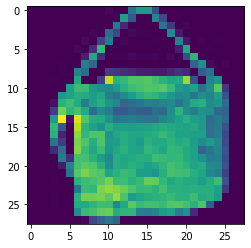

Bag


In [8]:
print_clothing(train_img,train_lbl, 212)

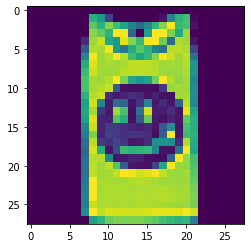

T-shirt/top


In [10]:
print_clothing(train_img, train_lbl, 101)

These images are stored in a large array of grayscale values.  If we print out the image data, we can see the top row is all black (0), and the next row has some values representing the top of the shirt.  

In [12]:
print(train_img[101])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 160 138  52   0   0   0   0   0   0  14
  116 166 179   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 190 164 207 176 151 111  88 120 169 208
  255 174 181  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 210 194 166 254 251  87   0 148 254 255
  204 155 216   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  33 218 235 153 135 243 208 173 252 255 198
   85 225 218  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  75 226 222 250 136  98 158 188 166 115  95
  227 229 223  52   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 120 252 218 226 253 227 176 153 170 209 252
  235 219 231  94   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 158 243 219 223 219 223 230 231 230 226 219
  220 218 228 134   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 173 236 220 219 219 228 231 230 22


When doing the ANN, we want to have values from 0 to 1 instead of 0 to 255.  Let's normalize this.

In [21]:
train_img  = train_img / 255.0
test_img = test_img / 255.0

print(train_img[101][1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.62745098 0.54117647 0.20392157 0.
 0.         0.         0.         0.         0.         0.05490196
 0.45490196 0.65098039 0.70196078 0.02352941 0.         0.
 0.         0.         0.         0.        ]


These are now floats between 0 and 1, which is perfect.

Now, per the assignment, we are going to define a model with one hidden layer (the "keras.layers.Dense(128, activation=tf.nn.relu)" layer.


In [15]:
model = keras.models.Sequential([keras.layers.Flatten(), 
                                    keras.layers.Dense(128, activation=tf.nn.relu), 
                                    keras.layers.Dense(10, activation=tf.nn.softmax)])

Now we will actually *train* this model.

In [22]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_lbl, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4956 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8911


We now have a trained model with our training data.  Let's see how accurately it predicts our test data.

In [23]:
model.evaluate(test_img, test_lbl)

313/313 [==============================] - 1s 1ms/step - loss: 0.3653 - accuracy: 0.8684


[0.36527085304260254, 0.868399977684021]

This is showing an accuracy of 86.8%, which for a 5 epoch run with only one hidden layer, seems like an acceptable rate.  

In [25]:
classifications = model.predict(test_img)

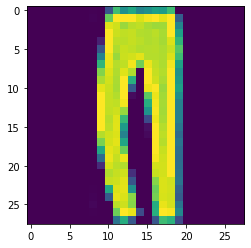

Trouser


In [27]:
print_clothing(test_img, test_lbl,2)

In [34]:
print(classifications[2])


[3.8143736e-07 9.9999964e-01 2.6717739e-10 1.3653415e-08 2.7340183e-09
 1.1581981e-15 2.7067248e-10 3.7657153e-17 4.4980832e-13 8.3551773e-17]


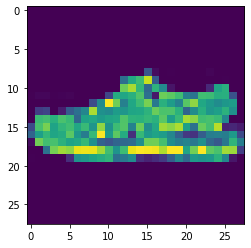

Sandal


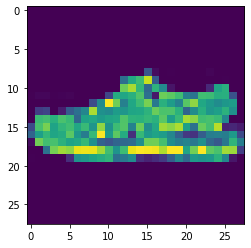

Sandal


In [42]:
print_classification_clothing(test_img, classifications, 21)
print_clothing(test_img, test_lbl, 21)

The first value is what our model predicted, and the second is what it actually was.  In this case, our model predicted this properly.  